In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("data/titanic_temp.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

### mean, median imputation

Suitable for column having less than 5% missing values

In [4]:
df_mm = df.copy()

In [5]:
mean_age = df_mm['Age'].mean()
median_age = df_mm['Age'].median()

mean_fare = df_mm['Fare'].mean()
median_fare = df_mm['Fare'].median()

In [6]:
df_mm['Age_median'] = df_mm['Age'].fillna(median_age)
df_mm['Age_mean'] = df_mm['Age'].fillna(mean_age)

df_mm['Fare_median'] = df_mm['Fare'].fillna(median_fare)
df_mm['Fare_mean'] = df_mm['Fare'].fillna(mean_fare)

In [7]:
df_mm.sample(5)

,Age,Fare,Family,Survived,Age_median,Age_mean,Fare_median,Fare_mean
752,33.0,9.500,0,0,33.0,33.000000,9.500,9.500
460,48.0,26.550,0,1,48.0,48.000000,26.550,26.550
354,NaN,7.225,0,0,28.0,29.699118,7.225,7.225
348,3.0,15.900,2,1,3.0,3.000000,15.900,15.900
201,NaN,69.550,10,0,28.0,29.699118,69.550,69.550


In [8]:
#check variance before and after imputation
print('Original Age variable variance: ', df_mm['Age'].var())
print('Age Variance after median imputation: ', df_mm['Age_median'].var())
print('Age Variance after mean imputation: ', df_mm['Age_mean'].var())

print('Original Fare variable variance: ', df_mm['Fare'].var())
print('Fare Variance after median imputation: ', df_mm['Fare_median'].var())
print('Fare Variance after mean imputation: ', df_mm['Fare_mean'].var())

Original Age variable variance:  211.0191247463081
Age Variance after median imputation:  169.51249827942328
Age Variance after mean imputation:  169.05239993721085
Original Fare variable variance:  2530.6730768999487
Fare Variance after median imputation:  2417.971599672526
Fare Variance after mean imputation:  2402.717696607255


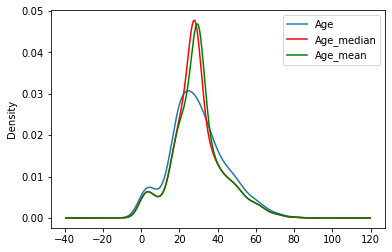

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_mm['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
df_mm['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df_mm['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

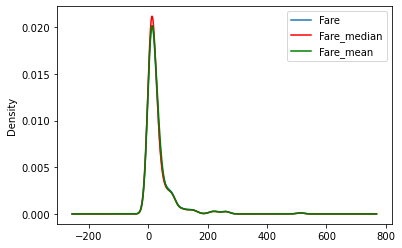

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_mm['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
df_mm['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df_mm['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [11]:
df_mm.cov()

,Age,Fare,Family,Survived,Age_median,Age_mean,Fare_median,Fare_mean
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,73.196997,73.727862
Fare,78.071438,2530.673077,17.460363,6.442361,65.546143,62.210610,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-5.159658,-5.213332,16.611725,16.577535
Survived,-0.551296,6.442361,0.013063,0.236772,-0.411226,-0.441656,6.021945,6.116624
Age_median,211.019125,65.546143,-5.159658,-0.411226,169.512498,169.052400,61.706696,62.232012
Age_mean,211.019125,62.210610,-5.213332,-0.441656,169.052400,169.052400,58.639842,59.065130
Fare_median,73.196997,2530.673077,16.611725,6.021945,61.706696,58.639842,2417.971600,2402.717697
Fare_mean,73.727862,2530.673077,16.577535,6.116624,62.232012,59.065130,2402.717697,2402.717697


In [12]:
df_mm.corr()

,Age,Fare,Family,Survived,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.096203,0.097273
Fare,0.099481,1.000000,0.212626,0.263920,0.099626,0.094681,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.245619,-0.248512,0.209378,0.209609
Survived,-0.077221,0.263920,0.016639,1.000000,-0.064910,-0.069809,0.251678,0.256445
Age_median,1.000000,0.099626,-0.245619,-0.064910,1.000000,0.998642,0.096384,0.097513
Age_mean,1.000000,0.094681,-0.248512,-0.069809,0.998642,1.000000,0.091718,0.092676
Fare_median,0.096203,1.000000,0.209378,0.251678,0.096384,0.091718,1.000000,0.996841
Fare_mean,0.097273,1.000000,0.209609,0.256445,0.097513,0.092676,0.996841,1.000000


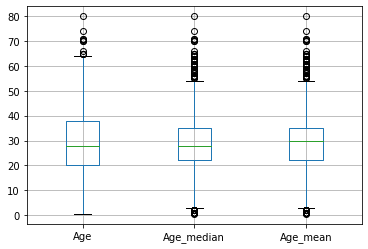

In [13]:
#box plot for age column
df_mm[['Age', 'Age_median', 'Age_mean']].boxplot()
plt.show()

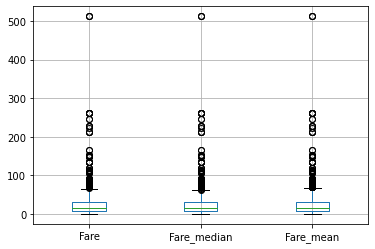

In [14]:
#for fare column
df_mm[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()

### arbitary value imputation

In [15]:
df_ar = df.copy()

In [16]:
df_ar['Age_99'] = df_ar['Age'].fillna(99)
df_ar['Age_minus1'] = df_ar['Age'].fillna(-1)

df_ar['Fare_999'] = df_ar['Fare'].fillna(999)
df_ar['Fare_minus1'] = df_ar['Fare'].fillna(-1)

In [17]:
df_ar.sample(5)

,Age,Fare,Family,Survived,Age_99,Age_minus1,Fare_999,Fare_minus1
108,38.0,7.8958,0,0,38.0,38.0,7.8958,7.8958
812,35.0,10.5000,0,0,35.0,35.0,10.5000,10.5000
542,11.0,31.2750,6,0,11.0,11.0,31.2750,31.2750
531,NaN,7.2292,0,0,99.0,-1.0,7.2292,7.2292
269,35.0,135.6333,0,1,35.0,35.0,135.6333,135.6333


In [18]:
print('Original Age variable variance: ', df_ar['Age'].var())
print('Age Variance after 99 wala imputation: ', df_ar['Age_99'].var())
print('Age Variance after -1 wala imputation: ', df_ar['Age_minus1'].var())

print('Original Fare variable variance: ', df_ar['Fare'].var())
print('Fare Variance after 999 wala imputation: ', df_ar['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', df_ar['Fare_minus1'].var())

Original Age variable variance:  211.0191247463081
Age Variance after 99 wala imputation:  934.4397775893746
Age Variance after -1 wala imputation:  319.24742711837445
Original Fare variable variance:  2530.6730768999487
Fare Variance after 999 wala imputation:  47268.69867189274
Fare Variance after -1 wala imputation:  2455.887435937784


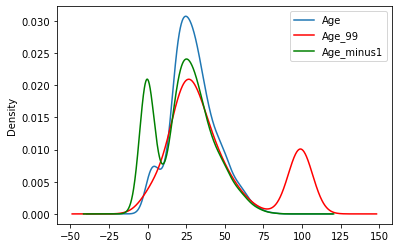

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_ar['Age'].plot(kind='kde', ax=ax)

# variable imputed with imputation 99
df_ar['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with imputation -1
df_ar['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

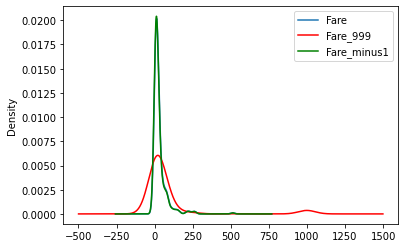

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_ar['Fare'].plot(kind='kde', ax=ax)

# variable imputed with 99
df_ar['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
df_ar['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [21]:
df_ar.cov()

,Age,Fare,Family,Survived,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,102.518527,72.736744
Fare,78.071438,2530.673077,17.460363,6.442361,-73.833768,122.475966,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-7.402498,-4.243568,14.723310,16.641367
Survived,-0.551296,6.442361,0.013063,0.236772,-1.682796,0.108147,11.251402,5.939859
Age_99,211.019125,-73.833768,-7.402498,-1.682796,934.439778,-170.001251,-268.298084,-63.277655
Age_minus1,211.019125,122.475966,-4.243568,0.108147,-170.001251,319.247427,237.363725,112.115172
Fare_999,102.518527,2530.673077,14.723310,11.251402,-268.298084,237.363725,47268.698672,858.207252
Fare_minus1,72.736744,2530.673077,16.641367,5.939859,-63.277655,112.115172,858.207252,2455.887436


In [22]:
df_ar.corr()

,Age,Fare,Family,Survived,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.031311,0.094827
Fare,0.099481,1.000000,0.212626,0.263920,-0.047700,0.135581,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.150088,-0.147201,0.041972,0.208126
Survived,-0.077221,0.263920,0.016639,1.000000,-0.113133,0.012439,0.106354,0.246324
Age_99,1.000000,-0.047700,-0.150088,-0.113133,1.000000,-0.311252,-0.040370,-0.041771
Age_minus1,1.000000,0.135581,-0.147201,0.012439,-0.311252,1.000000,0.061103,0.126618
Fare_999,0.031311,1.000000,0.041972,0.106354,-0.040370,0.061103,1.000000,0.079653
Fare_minus1,0.094827,1.000000,0.208126,0.246324,-0.041771,0.126618,0.079653,1.000000


### using sklearn

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [24]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### mean_median imputation

In [25]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [26]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
],remainder='passthrough')

In [27]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [28]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [29]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [30]:
X_train1 = trf.transform(X_train)
X_test1 = trf.transform(X_test)

In [31]:
X_train1

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

#### arbitary value imputation

In [32]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [33]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [34]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [35]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [36]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [37]:
X_train2 = trf.transform(X_train)
X_test2 = trf.transform(X_test)

In [38]:
X_train2

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])